In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd drive/My\ Drive/YOLOv3

/content/drive/My Drive/YOLOv3


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from class_yolov3 import YOLOv3, decode
import utils
import postprocess
import cv2

#----------------------------------------------------------------
#   build model and load the saved weights
#
def get_inference_model(input_shape=(416, 416, 3)):
    input_layer  = tf.keras.layers.Input(shape=input_shape)
    YOLO = YOLOv3() # create an instance
    feature_maps = YOLO(input_layer)

    predictions = []
    for i, fm in enumerate(feature_maps):
        pred_tensor = decode(fm, i)
        predictions.append(pred_tensor)

    inference_model = tf.keras.Model(input_layer, predictions)
    #----------------------------------------------------------------
    # A> use the fully trained weights from yunyang
    #utils.load_weights(inference_model, "./yolov3.weights")# TF native format
    #----------------------------------------------------------------
    # B> use the weights  partly trained on google colab
    inference_model.load_weights("./yolov3_weights20_iou.h5")# h5 format
    return inference_model


inference_model = get_inference_model()
# A: yolov3.weights
##score_threshold = 0.5 
##iou_threshold = 0.6
##max_detections = 20
#-----------------------------
score_threshold = 0.25 
iou_threshold = 0.30
max_detections = 10


pred_bbox.shape : (10647, 25)
tf.Tensor([[132.92078   27.101181 285.40228  263.29205 ]], shape=(1, 4), dtype=float32)
tf.Tensor([14], shape=(1,), dtype=int64)
bboxes : [[107.87012482  31.27059364 283.81033325 303.79852295   0.30611965
   14.        ]]


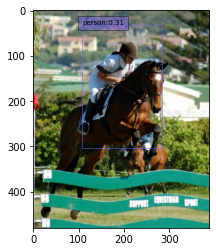

pred_bbox.shape : (10647, 25)
tf.Tensor(
[[125.619064 139.36111  233.49492  279.83658 ]
 [ 38.5459    72.56436  315.35187  349.13422 ]
 [-42.90331  175.58252  143.23549  298.86395 ]], shape=(3, 4), dtype=float32)
tf.Tensor([6 6 6], shape=(3,), dtype=int64)
bboxes : [[1.50984451e+02 1.05001335e+02 2.80642914e+02 2.73842041e+02
  4.17006254e-01 6.00000000e+00]
 [4.63292046e+01 2.47167797e+01 3.79028687e+02 3.57132477e+02
  3.74820322e-01 6.00000000e+00]
 [0.00000000e+00 1.48536682e+02 1.72158035e+02 2.96711487e+02
  2.99213350e-01 6.00000000e+00]]


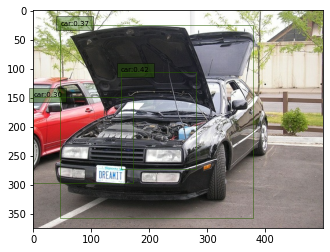

pred_bbox.shape : (10647, 25)
tf.Tensor([[136.53954  108.897446 281.39752  368.03455 ]], shape=(1, 4), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)
bboxes : [[1.64110016e+02 6.83863525e+01 3.38218170e+02 3.74000000e+02
  2.61680454e-01 2.00000000e+00]]


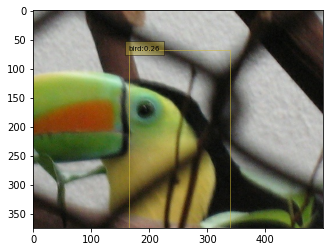

pred_bbox.shape : (10647, 25)
tf.Tensor(
[[ 44.911163 -17.706665 376.8882   440.42865 ]
 [138.1513   133.34464  281.38687  285.2967  ]], shape=(2, 4), dtype=float32)
tf.Tensor([17  9], shape=(2,), dtype=int64)
bboxes : [[0.00000000e+00 0.00000000e+00 3.74000000e+02 4.99000000e+02
  3.91625851e-01 1.70000000e+01]
 [1.03547241e+02 1.60269989e+02 2.75705383e+02 3.42904663e+02
  2.63552576e-01 9.00000000e+00]]


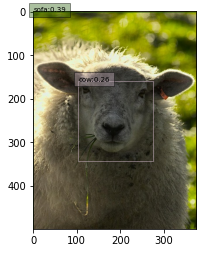

pred_bbox.shape : (10647, 25)
tf.Tensor([], shape=(0, 4), dtype=float32)
tf.Tensor([], shape=(0,), dtype=int64)
bboxes : []


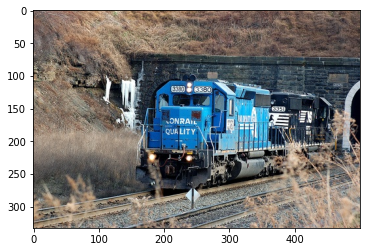

In [4]:
train_ds, val_ds = tfds.load("voc", split=["train[0:27]", "validation[:10]"]
                             , data_dir="data")
%matplotlib inline
for sample in train_ds.take(5):
    oimage = sample['image']
    #---------------------------------------------   
    # jitter is false for inference
    image_data, new_size, ratio, offsets = utils.resize_and_pad_image(oimage, jitter=False)
    oimage_size = oimage.shape[:2]
    #---------------------------------------------
    #image_data = image_data/255.0
    bboxes = postprocess.detections(inference_model, image_data, oimage_size, score_threshold, \
                                    iou_threshold, max_detections)
    print('bboxes :', bboxes)
    postprocess.display_detections(oimage, bboxes)
